# 图像入门
**cv.imread()，cv.imshow()，cv.imwrite()**
如何使用Matplotlib显示图像

In [1]:
import numpy as np
import cv2 as cv

## 读取和显示图象
`cv.imread()`第二个参数是一个标志，它指定了读取图像的方式。
* cv.IMREAD_COLOR： 加载彩色图像。任何图像的透明度都会被忽视。它是默认标志。
* cv.IMREAD_GRAYSCALE：以灰度模式加载图像
* cv.IMREAD_UNCHANGED：加载图像，包括alpha通道
注意 除了这三个标志，你可以分别简单地传递整数1、0或-1。
即使图像路径错误，它也不会引发任何错误，但是`print img`会给出`None`

`cv.imshow()`第一个参数是窗口名称，它是一个字符串。第二个参数是我们的对象。你可以根据需要创建任意多个窗口，但可以使用不同的窗口名称。

`cv.waitKey()`是一个键盘绑定函数。其参数是以毫秒为单位的时间。该函数等待任何键盘事件指定的毫秒。如果您在这段时间内按下任何键，程序将继续运行。如果**0**被传递，它将无限期地等待一次敲击键。它也可以设置为检测特定的按键，例如，如果按下键 a 等，我们将在下面讨论。
cv.destroyAllWindows()只会破坏我们创建的所有窗口。如果要销毁任何特定的窗口，请使用函数 cv.destroyWindow()在其中传递确切的窗口名称作为参数。


In [3]:
img = cv.imread('./images/test.jpg',0)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

注意 在特殊情况下，你可以创建一个空窗口，然后再将图像加载到该窗口。在这种情况下，你可以指定窗口是否可调整大小。这是通过功能**cv.namedWindow**()完成的。默认情况下，该标志为**cv.WINDOW_AUTOSIZE**。但是，如果将标志指定为**cv.WINDOW_NORMAL**，则可以调整窗口大小。当图像尺寸过大以及向窗口添加跟踪栏时，这将很有帮助。

In [ ]:
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 写入图像
使用函数**cv.imwrite**()保存图像。
第一个参数是文件名，第二个参数是要保存的图像。`cv.imwrite('messigray.png'，img)` 这会将图像以PNG格式保存在工作目录中。

在下面的程序中，以灰度加载图像，显示图像，按`s`保存图像并退出，或者按`ESC`键直接退出而不保存。

In [ ]:
img = cv.imread('test.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # 等待ESC退出
    cv.destroyAllWindows()
elif k == ord('s'): # 等待关键字，保存和退出
    cv.imwrite('testgray.png',img)
    cv.destroyAllWindows()

## 使用Matplotlib
Matplotlib是Python的绘图库，可为你提供多种绘图方法。你将在接下来的文章中看到它们。在这里，你将学习如何使用Matplotlib显示图像。你可以使用Matplotlib缩放图像，保存图像等。

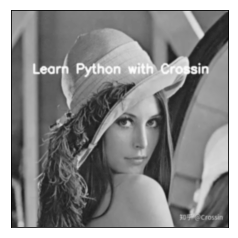

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread('test.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

**警告**
OpenCV加载的彩色图像处于BGR模式。但是Matplotlib以RGB模式显示。因此，如果使用OpenCV读取彩色图像，则Matplotlib中将无法正确显示彩色图像。
有以下方法

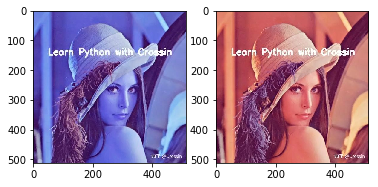

In [3]:
img = cv.imread('test.jpg')
b,g,r = cv.split(img)
img2 = cv.merge([r,g,b])
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

或者下面这两种方法

In [ ]:
img2 = img[:,:,::-1]

cv.cvtColor(img, cv.COLOR_BGR2RGB)